In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", None)

## Prepare data

### Build DataFrame

In [2]:
data_train = pd.read_csv('data/train.csv')

In [3]:
data_train.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,165586.0,0.455,0.699,0.456,0.324,0.485,0.567,7.0,4.0,0.0,1.0,0.0,1.0,0.0420,0.0298,0.0751,0.537,0.61500,0.319,0.000000,0.000022,0.000006,0.125,0.1080,0.0407,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,238293.0,0.814,0.826,0.697,0.566,0.816,0.593,10.0,1.0,2.0,0.0,0.0,0.0,0.3440,0.0683,0.1940,0.081,0.02010,0.227,0.000023,0.000939,0.000000,0.106,0.1270,0.1100,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,160293.0,0.357,0.638,0.670,0.238,0.523,0.700,8.0,1.0,1.0,0.0,1.0,1.0,0.2650,0.3570,0.1960,0.142,0.00454,0.576,0.085900,0.000000,0.000005,0.550,0.0842,0.2260,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,205373.0,0.640,0.629,0.616,0.707,0.721,0.327,8.0,6.0,5.0,1.0,1.0,1.0,0.0283,0.0277,0.0264,0.026,0.50200,0.472,0.000001,0.000000,0.000001,0.182,0.3070,0.1210,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,89106.0,0.773,0.488,0.653,0.437,0.311,0.159,9.0,1.0,1.0,1.0,1.0,1.0,0.0963,0.0631,0.0551,0.836,0.48600,0.812,0.000024,0.000008,0.000000,0.544,0.1130,0.1550,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [4]:
data_train.shape

(160000, 45)

In [5]:
data_test = pd.read_csv('data/test.csv')

In [6]:
data_test.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,t_energy2,t_key0,t_key1,t_key2,t_mode0,t_mode1,t_mode2,t_speech0,t_speech1,t_speech2,t_acous0,t_acous1,t_acous2,t_ins0,t_ins1,t_ins2,t_live0,t_live1,t_live2,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2
0,160000,Vizlaxy One,2021-08-24,"The Vizlaxy,",11,Ciko,Kumne,Pod Sem,34901,33343.0,32896.0,0.239,0.278,0.453,0.105,0.0685,0.171,0.0,0.0,4.0,1.0,1.0,1.0,0.0352,0.0418,0.0681,0.983000,0.970000,0.996000,0.979000,0.986,0.929000,0.1090,0.118,0.0785,0.0397,0.0381,0.0374,89.674,84.987,122.585,3.0,4.0,4.0
1,160001,OTW (Acoustic Version),2018-06-25,"Missy & Blonde,",1,OTW - Acoustic Version,NaN,NaN,201655,NaN,NaN,0.595,NaN,NaN,0.294,NaN,NaN,8.0,NaN,NaN,0.0,NaN,NaN,0.0370,NaN,NaN,0.851000,NaN,NaN,0.000000,NaN,NaN,0.1290,NaN,NaN,0.5300,NaN,NaN,129.998,NaN,NaN,4.0,NaN,NaN
2,160002,Ocean Avenue,2003-01-01,"Yellowcard,",13,Way Away,Breathing,Ocean Avenue,202093,218706.0,198266.0,0.357,0.382,0.486,0.959,0.9320,0.904,2.0,4.0,6.0,0.0,0.0,0.0,0.1130,0.0716,0.0638,0.000007,0.000035,0.000034,0.000039,0.000,0.000028,0.0825,0.243,0.0947,0.3640,0.5700,0.7860,179.644,179.581,173.734,4.0,4.0,4.0
3,160003,Bloomsday (Remastered),2018-02-16,"Esbe,",19,Float - Remastered,Fulfill / The Dream - Remastered,Wanderlust - Remastered,182783,416000.0,214925.0,0.712,0.322,0.689,0.430,0.5690,0.643,9.0,0.0,2.0,0.0,1.0,1.0,0.0992,0.0468,0.0568,0.067000,0.125000,0.003600,0.892000,0.631,0.590000,0.0992,0.437,0.2600,0.4560,0.1070,0.5830,194.107,89.533,134.016,3.0,4.0,4.0
4,160004,Miss You,2021-09-03,"SLANDER, Ganja White Night,",1,Miss You,NaN,NaN,200000,NaN,NaN,0.392,NaN,NaN,0.472,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0481,NaN,NaN,0.088300,NaN,NaN,0.000001,NaN,NaN,0.0954,NaN,NaN,0.0526,NaN,NaN,74.473,NaN,NaN,4.0,NaN,NaN


In [7]:
data_test.shape

(21207, 44)

In [8]:
data = pd.concat([data_train, data_test]).reset_index(drop=True)

In [9]:
data.shape

(181207, 45)

### Explore data

In [10]:
data['t_dur0'].mean()

199064.77318205146

In [11]:
data['t_dur1'].mean()

213412.0950920969

In [12]:
data['t_dur2'].mean()

214206.37636307412

### Calculate average duration

In [13]:
data['duration'] = data[['t_dur0', 't_dur1', 't_dur2']].mean(axis=1)

In [14]:
data['year'] = data['release_date'].apply(lambda x: x.split('-')[0])

In [15]:
df = data[['year', 'duration']]

In [16]:
len(df)

181207

In [17]:
df.head()

,year,duration
0,2021,192284.000000
1,2019,195199.666667
2,2017,154768.333333
3,1996,203866.333333
4,2018,140693.000000


### Start at 1970

In [18]:
# df_mean.sort_values('year')[29:34]
df['year'] = df['year'].apply(lambda x: int(x))
df = df[df['year'] > 1969]
df.dropna(inplace=True)

C:\Users\A103033867\AppData\Local\Temp\ipykernel_13180\2377385162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].apply(lambda x: int(x))
C:\Users\A103033867\AppData\Local\Temp\ipykernel_13180\2377385162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [19]:
df.head()

,year,duration
0,2021,192284.000000
1,2019,195199.666667
2,2017,154768.333333
3,1996,203866.333333
4,2018,140693.000000


In [20]:
len(df)

179860

In [21]:
# df.value_counts('year').sort_index()

### Prepare data

In [22]:
# df_median = df.groupby('year').median().reset_index()
df_mean = df.groupby('year').mean().reset_index()

In [23]:
# df_median['std'] = df.groupby('year').std(ddof=0).values
df_mean['std'] = df.groupby('year').std(ddof=0).values

In [24]:
# df_median.head()
df_mean.head()

,year,duration,std
0,1970,232330.055556,95726.855853
1,1971,258019.825911,125911.382094
2,1972,259673.677696,103308.148814
3,1973,255033.393110,119632.715322
4,1974,234397.940476,88537.623702


In [25]:
# x = df_median['year']
x = df_mean['year']

In [26]:
x[:5]

0    1970
1    1971
2    1972
3    1973
4    1974
Name: year, dtype: int64

In [27]:
# y = df_median['duration']
y = df_mean['duration']
y = y/1000/60  # convert from ms to min

In [28]:
y[:5]

0    3.872168
1    4.300330
2    4.327895
3    4.250557
4    3.906632
Name: duration, dtype: float64

In [29]:
# err = df_median['std']/1000/60
err = df_mean['std']/1000/60

In [30]:
err[:5]

0    1.595448
1    2.098523
2    1.721802
3    1.993879
4    1.475627
Name: std, dtype: float64

### Plot the data

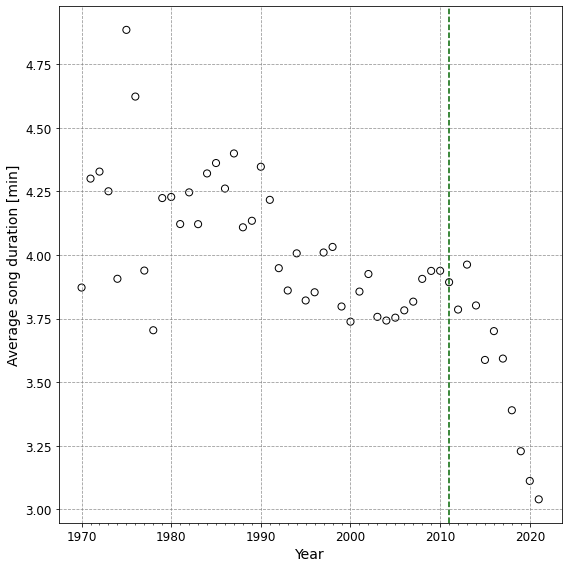

In [31]:
# e = df_mean['std'][-52:]/1000

# A plain scatterplot
fig, ax = plt.subplots(figsize=(8, 8))

# ax.scatter(x[:5], y[:5], color='k', facecolor='none', s=50, alpha=1)
# ax.scatter(x[5:7], y[5:7], color='k', facecolor='none', s=50, alpha=0.5)
# ax.scatter(x[7:8], y[7:8], color='k', facecolor='none', s=50, alpha=1)
# ax.scatter(x[8:9], y[8:9], color='k', facecolor='none', s=50, alpha=0.5)
# ax.scatter(x[9:], y[9:], color='k', facecolor='none', s=50, alpha=1)

ax.scatter(x, y, color='k', facecolor='none', s=50, alpha=1)
# errobar = ax.errorbar(x, y, err, fmt='o')

# ax.set_xticks(np.arange(0, len(x), 5))
ax.set_xticks(np.arange(x.iloc[0], x.iloc[-1], 1), minor=True)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax.set_xlabel('Year', fontsize=14)
# ax.set_ylabel('Median song duration [min]', fontsize=14)
ax.set_ylabel('Average song duration [min]', fontsize=14)

ax.grid(alpha=0.8, color='grey', linestyle='dashed', zorder=0)

# Spotify US-launch was in July 2011
plt.axvline(x=2011, color='darkgreen', linestyle='--')

# plt.plot(x_1, y_1_pred, color='k', alpha=1, linestyle=':')
# plt.plot(x_2, y_2_pred, color='k', alpha=1, linestyle=':')

plt.tight_layout()
# plt.savefig('scatterplot.jpg')

### Finalize the data

In [32]:
# divide data into pre- and after-spotify (2011)
x_1 = x[:-10]
y_1 = y[:-10]

x_2 = x[-10:]
y_2 = y[-10:]

In [33]:
# remove outliers from first dataset
x_1.pop(5)
x_1.pop(6)
x_1.pop(8)

y_1.pop(5)
y_1.pop(6)
y_1.pop(8)

3.704363288052943

In [34]:
x_1 = x_1.values.reshape(-1, 1)
y_1 = y_1.values

x_2 = x_2.values.reshape(-1, 1)
y_2 = y_2.values

## First dataset-part

### Linear regression

In [35]:
# fit
regr_1 = LinearRegression()
regr_1.fit(x_1, y_1)

y_1_pred = regr_1.predict(x_1)

print("Slope:", regr_1.coef_)

Slope: [-0.01082882]


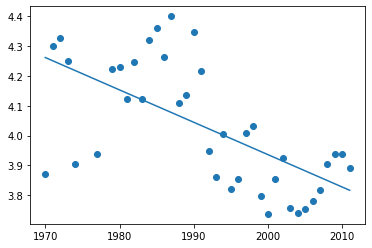

In [36]:
# plot
plt.scatter(x_1, y_1)
plt.plot(x_1, y_1_pred)

### Constant mean

In [98]:
y_1_mean = np.empty_like(y_1)
y_1_mean.fill(y_1.mean())

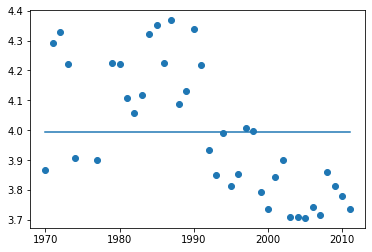

In [99]:
plt.scatter(x_1, y_1)
plt.plot(x_1, y_1_mean)

### Gaussian process regression

In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, ExpSineSquared, RationalQuadratic, ConstantKernel

In [38]:
# Instantiate a Gaussian Process model    
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
         + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

In [39]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, normalize_y=False)

In [40]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_1, y_1)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=100)

In [41]:
y_1_gauss = gp.predict(x_1, return_std=False)

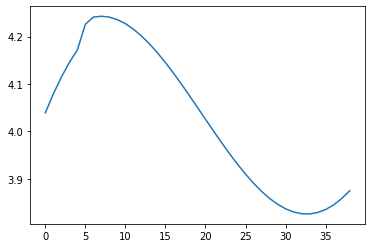

In [42]:
plt.plot(y_1_gauss)

## Second dataset-part

### Linear regression

In [43]:
# plot
regr_2 = LinearRegression()
regr_2.fit(x_2, y_2)

x_2_pred = np.append(x_2, 2022).reshape(-1, 1)
y_2_pred = regr_2.predict(x_2_pred)

print("Slope: ", regr_2.coef_)

Slope:  [-0.09836625]


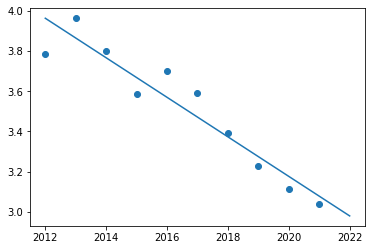

In [44]:
# plot
plt.scatter(x_2, y_2)
plt.plot(x_2_pred, y_2_pred)

## Final Plot

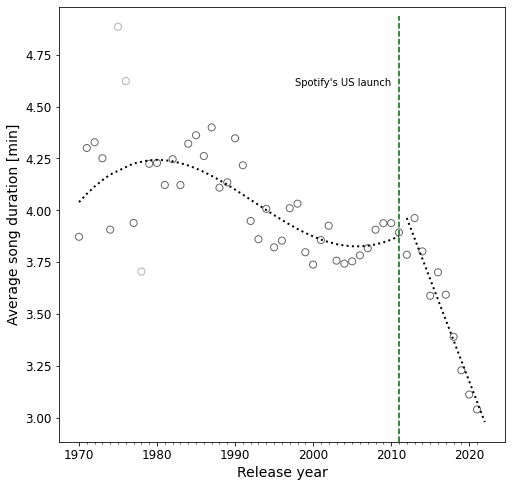

In [101]:
# e = df_mean['std'][-52:]/1000

# A plain scatterplot
fig, ax = plt.subplots(figsize=(8, 8))

# scatter = ax.scatter(x, y, color='k', facecolor='none', s=50, alpha=1)

ax.scatter(x[:5], y[:5], color='k', facecolor='none', s=50, alpha=0.6)
ax.scatter(x[5:7], y[5:7], color='k', facecolor='none', s=50, alpha=0.3)
ax.scatter(x[7:8], y[7:8], color='k', facecolor='none', s=50, alpha=0.6)
ax.scatter(x[8:9], y[8:9], color='k', facecolor='none', s=50, alpha=0.3)
ax.scatter(x[9:], y[9:], color='k', facecolor='none', s=50, alpha=0.6)

# err = ax.errorbar(x, y, e, fmt='o')

# ax.set_xticks(np.arange(0, len(x), 5))
ax.set_xticks(np.arange(x.iloc[0], x.iloc[-1]+1, 1), minor=True)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax.set_xlabel('Release year', fontsize=14)
ax.set_ylabel('Average song duration [min]', fontsize=14)

# ax.grid(alpha=0.8, color='grey', linestyle='dashed', zorder=0)

plt.axvline(x=2011, ymin=0, ymax=0.98, color='darkgreen', linestyle='--', linewidth=1.5, label="Spotify's US launch (2011)")

# plt.plot(x_1, y_1_pred, color='k', alpha=1, linestyle=':')
# plt.plot(x_1, y_1_mean, color='k', alpha=1, linestyle=':')
# plt.plot(x_1, test_func(x_1, dist, amp, omega, phi), color='k', alpha=1, linestyle=':')  
plt.plot(x_1, y_1_gauss, color='k', alpha=1, linestyle=':', linewidth=2)  
plt.plot(x_2_pred, y_2_pred, color='k', alpha=1, linestyle=':', linewidth=2)

# leg = ax.legend(loc='upper right', bbox_to_anchor=(0.76, 0.1), frameon=False, markerfirst=True)
ax.text(1997.7, 4.6, "Spotify's US launch")

# plt.tight_layout()
plt.savefig('final_plot.pdf')
plt.savefig('final_plot.jpg')

# Füge Legende für Regressions hinzu 